In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Body Posture Features

In [2]:
BPF = pd.read_csv("Body Posture Features.csv")

In [3]:
BPF.head()

,PP,Blok,Condition,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv),Added
0,PP1,1,R,20120818T131600000,2102.597393,-116.055931,115.017758,92.340895,176.389544,155.409463,62.360535,67

In [4]:
BPF.shape

(3139, 99)

In [5]:
BPF.dtypes

PP                                           object
Blok                                          int64
Condition                                    object
timestamp                                    object
avgDepth(avg)                               float64
                                             ...   
ElbowRight_WristRight-PlaneYZAxisZ(stdv)    float64
WristRight_HandRight-PlaneZXAxisX(stdv)     float64
WristRight_HandRight-PlaneXYAxisY(stdv)     float64
WristRight_HandRight-KinectZAxis(stdv)      float64
Added                                        object
Length: 99, dtype: object

In [6]:
BPF.describe()

,Blok,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
count,3139.000000,2741.000000,2741.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000

In [7]:
BPF['Condition'].unique()

array(['R', 'N', 'T', 'I'], dtype=object)

In [8]:
BPF = BPF[BPF.Condition != 'R']

In [9]:
BPF.shape

(2688, 99)

In [10]:
BPF['Added'].unique()

array([nan, 'added'], dtype=object)

In [11]:
BPF = BPF[BPF.Added != 'added']

In [12]:
BPF = BPF.drop('Added', 1)

In [13]:
BPF.shape

(2323, 98)

In [14]:
BPF.count()

PP                                          2323
Blok                                        2323
Condition                                   2323
timestamp                                   2323
avgDepth(avg)                               2323
                                            ... 
ElbowRight_WristRight-PlaneXYAxisY(stdv)    2321
ElbowRight_WristRight-PlaneYZAxisZ(stdv)    2322
WristRight_HandRight-PlaneZXAxisX(stdv)     2322
WristRight_HandRight-PlaneXYAxisY(stdv)     2321
WristRight_HandRight-KinectZAxis(stdv)      2321
Length: 98, dtype: int64

In [15]:
BPF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 6 to 3138
Data columns (total 98 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   PP                                                           2323 non-null   object 
 1   Blok                                                         2323 non-null   int64  
 2   Condition                                                    2323 non-null   object 
 3   timestamp                                                    2323 non-null   object 
 4   avgDepth(avg)                                                2323 non-null   float64
 5   leftShoulderAngle(avg)                                       2323 non-null   float64
 6   rightShoulderAngle(avg)                                      2323 non-null   float64
 7   leanAngle(avg)                                               2323 non-null   f

In [16]:
BPF.isnull().sum()

PP                                          0
Blok                                        0
Condition                                   0
timestamp                                   0
avgDepth(avg)                               0
                                           ..
ElbowRight_WristRight-PlaneXYAxisY(stdv)    2
ElbowRight_WristRight-PlaneYZAxisZ(stdv)    1
WristRight_HandRight-PlaneZXAxisX(stdv)     1
WristRight_HandRight-PlaneXYAxisY(stdv)     2
WristRight_HandRight-KinectZAxis(stdv)      2
Length: 98, dtype: int64

In [17]:
BPF = BPF.fillna(BPF.mean())

In [18]:
BPF.isnull().sum()

PP                                          0
Blok                                        0
Condition                                   0
timestamp                                   0
avgDepth(avg)                               0
                                           ..
ElbowRight_WristRight-PlaneXYAxisY(stdv)    0
ElbowRight_WristRight-PlaneYZAxisZ(stdv)    0
WristRight_HandRight-PlaneZXAxisX(stdv)     0
WristRight_HandRight-PlaneXYAxisY(stdv)     0
WristRight_HandRight-KinectZAxis(stdv)      0
Length: 98, dtype: int64

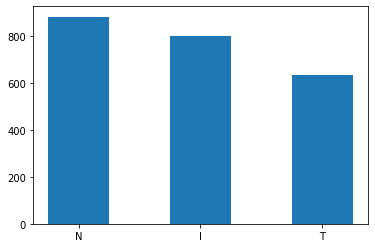

In [19]:
conditions = dict(BPF['Condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels, counts, width=0.5)
plt.show()

In [20]:
#Assigning numeric value to the condition column
labelencoder = LabelEncoder()
BPF['Condition'] = labelencoder.fit_transform(BPF['Condition'])
BPF['PP'] = labelencoder.fit_transform(BPF['PP'])
BPF.head()

,PP,Blok,Condition,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
6,0,1,1,20120818T132600000,2094.242298,-107.134975,101.430247,96.888494,174.241883,127.106764,76.934881,74.287494,

In [21]:
BPF['timestamp'] = pd.to_datetime(BPF.timestamp, format='%Y%m%dT%H%M%S%f', errors='coerce')
BPF['timestamp']

6      2012-08-18 13:26:00
7      2012-08-18 13:27:00
8      2012-08-18 13:28:00
9      2012-08-18 13:29:00
10     2012-08-18 13:30:00
               ...        
3134   2012-10-07 16:15:00
3135   2012-10-07 16:16:00
3136   2012-10-07 16:17:00
3137   2012-10-07 16:18:00
3138   2012-10-07 16:19:00
Name: timestamp, Length: 2323, dtype: datetime64[ns]

In [22]:
BPF[BPF.timestamp.isnull()]

,PP,Blok,Condition,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv)
2526,13,1,1,NaT,2121.793003,-115.798868,112.325485,117.273040,177.198782,163.577765,62.918212,70.372984,122.780891

In [23]:
BPF.dropna(subset=["timestamp"], inplace=True)

In [24]:
BPF['month'] = BPF['timestamp'].dt.month
BPF['date_day'] = BPF['timestamp'].dt.day
BPF['hour'] = BPF['timestamp'].dt.hour
BPF['min'] = BPF['timestamp'].dt.minute

BPF.head()

,PP,Blok,Condition,timestamp,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv),month,date_day,hour,min
6,0,1,1,2012-08-18 13:26:00,2094.242298,-107.134975,101.430247,96.888494,174.241883,127.10

In [25]:
#Spliting the data for train and test

In [26]:
X_BPF = BPF.drop(['Condition', 'timestamp'], axis=1)

In [27]:
y_BPF = BPF['Condition']

In [28]:
X_train_BPF, X_test_BPF, y_train_BPF, y_test_BPF = train_test_split(X_BPF, y_BPF, test_size=0.3)

#### Random Forest

In [29]:
rf_BPF = RandomForestClassifier()

In [30]:
rf_BPF.fit(X_train_BPF, y_train_BPF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred_BPF = rf_BPF.predict(X_test_BPF)

In [32]:
ac_BPF = accuracy_score(y_test_BPF, y_pred_BPF)
ac_BPF

0.9657228017883756

In [33]:
confusion_matrix(y_test_BPF, y_pred_BPF)

array([[246,   0,   7],
       [  0, 257,   0],
       [ 16,   0, 145]], dtype=int64)

In [34]:
# View the classification report for test data and predictions
print(classification_report(y_test_BPF, y_pred_BPF))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       253
           1       1.00      1.00      1.00       257
           2       0.95      0.90      0.93       161

    accuracy                           0.97       671
   macro avg       0.96      0.96      0.96       671
weighted avg       0.97      0.97      0.97       671



# 2. Computer Intraction Features

In [35]:
CIF = pd.read_csv("Computer Interaction Features.csv")

In [36]:
CIF.head()

,PP,Blok,Condition,timestamp,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,Unnamed: 20,Unnamed: 21
0,PP1,1,R,20120918T131600000,0,0,0,0,0,0,0.000000000000,0,0,0,0,0,0,0,0,0,NaN,NaN
1,PP1,1,R,20120918T131700000,0,0,0,0,0,0,0.000000000000,0,0,0,0,0,0,0,0,0,NaN,NaN
2,PP1,1,R,20120918T131800000,0,0,0,0,0,0,0.000000000000,0,0,0,0,0,0,0,0,0,NaN,NaN
3,PP1,1,R,20120918T131900000,0,0,0,0,0,0,0.000000000000,0,0,0,0,0,0,0,0,0,NaN,NaN
4,PP1,1,R,20120918T132000000,0,0,0,0,0,0,0.000000000000,0,0,0,0,0,0,0,0,0,NaN,NaN


In [37]:
CIF.shape

(3139, 22)

In [38]:
CIF.describe()

,Blok,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,Unnamed: 20
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,0.0
mean,1.936923,23.244982,15.855368,10.066582,10.231921,13.242752,11.572794,82.023574,55.188277,36.701179,12.718382,17.720612,10.520867,19.312201,12.937241,11.463523,NaN
std,0.826873,98.539873,98.418191,98.783933,98.773213,98.652794,98.670080,117.823171,107.036456,100.006143,99.075106,98.737944,98.751846,98.490354,98.565276,98.673213,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2.000000,10.000000,4.000000,0.000000,0.000000,1.000000,1.000000,54.000000,30.000000,21.000000,0.000000,3.000000,0.000000,5.000000,2.000000,0.000000,NaN
75%,3.000000,22.000000,10.000000,0.000000,0.000000,5.000000,2.000000,123.000000,77.000000,44.000000,0.000000,11.000000,0.000000,16.000000,5.000000,3.000000,NaN
max,3.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,NaN


In [39]:
CIF.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3134    False
3135    False
3136    False
3137    False
3138    False
Length: 3139, dtype: bool

In [40]:
CIF.dtypes

PP                   object
Blok                  int64
Condition            object
timestamp            object
SnMouseAct            int64
SnLeftClicked         int64
SnRightClicked        int64
SnDoubleClicked       int64
SnWheel               int64
SnDragged             int64
SnMouseDistance      object
SnKeyStrokes          int64
SnChars               int64
SnSpecialKeys         int64
SnDirectionKeys       int64
SnErrorKeys           int64
SnShortcutKeys        int64
SnSpaces              int64
SnAppChange           int64
SnTabfocusChange      int64
Unnamed: 20         float64
Unnamed: 21          object
dtype: object

In [41]:
CIF['SnMouseDistance'] = pd.to_numeric(CIF.SnMouseDistance, errors='coerce')

In [42]:
CIF[CIF.SnMouseDistance.isnull()]

,PP,Blok,Condition,timestamp,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,Unnamed: 20,Unnamed: 21
1290,PP11,1,N,20121009T100700000,1,1,0,0,0,0,NaN,247,143,104,26,25,0,35,0,0,NaN,NaN
2102,PP17,3,I,20121017T154500000,1,1,0,0,0,0,NaN,232,163,69,0,26,0,37,0,0,NaN,NaN


In [43]:
CIF.dropna(subset=["SnMouseDistance"], inplace=True)

In [44]:
CIF.count()

PP                  3137
Blok                3137
Condition           3137
timestamp           3137
SnMouseAct          3137
SnLeftClicked       3137
SnRightClicked      3137
SnDoubleClicked     3137
SnWheel             3137
SnDragged           3137
SnMouseDistance     3137
SnKeyStrokes        3137
SnChars             3137
SnSpecialKeys       3137
SnDirectionKeys     3137
SnErrorKeys         3137
SnShortcutKeys      3137
SnSpaces            3137
SnAppChange         3137
SnTabfocusChange    3137
Unnamed: 20            0
Unnamed: 21            2
dtype: int64

In [45]:
CIF.isnull().sum()

PP                     0
Blok                   0
Condition              0
timestamp              0
SnMouseAct             0
SnLeftClicked          0
SnRightClicked         0
SnDoubleClicked        0
SnWheel                0
SnDragged              0
SnMouseDistance        0
SnKeyStrokes           0
SnChars                0
SnSpecialKeys          0
SnDirectionKeys        0
SnErrorKeys            0
SnShortcutKeys         0
SnSpaces               0
SnAppChange            0
SnTabfocusChange       0
Unnamed: 20         3137
Unnamed: 21         3135
dtype: int64

In [46]:
CIF['Unnamed: 21'].unique()

array([nan, 'uLog crashed…  12:18:00', 'uLog crashed… 15:32'],
      dtype=object)

In [47]:
CIF = CIF.drop(['Unnamed: 20', 'Unnamed: 21'], axis=1)

In [48]:
CIF['Condition'].unique()

array(['R', 'N', 'T', 'I'], dtype=object)

In [49]:
CIF = CIF[CIF.Condition != 'R']

In [50]:
CIF.shape

(2686, 20)

In [51]:
#Assigning numeric value to the condition column
labelencoder = LabelEncoder()
CIF['Condition'] = labelencoder.fit_transform(CIF['Condition'])
CIF['PP'] = labelencoder.fit_transform(CIF['PP'])
CIF.head()

,PP,Blok,Condition,timestamp,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange
6,0,1,1,20120918T132600000,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0
7,0,1,1,20120918T132700000,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0
8,0,1,1,20120918T132800000,8,5,0,2,1,0,5691.235163,0,0,0,0,0,0,0,5,0
9,0,1,1,20120918T132900000,12,7,0,1,4,0,7726.999223,0,0,0,0,0,0,0,8,3
10,0,1,1,20120918T133000000,10,5,0,0,3,1,6307.768271,53,32,21,0,8,0,5,1,4


In [52]:
CIF['timestamp'] = pd.to_datetime(CIF.timestamp, format='%Y%m%dT%H%M%S%f')

In [53]:
CIF['month'] = CIF['timestamp'].dt.month
CIF['date_day'] = CIF['timestamp'].dt.day
CIF['hour'] = CIF['timestamp'].dt.hour
CIF['min'] = CIF['timestamp'].dt.minute

CIF.head()

,PP,Blok,Condition,timestamp,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,month,date_day,hour,min
6,0,1,1,2012-09-18 13:26:00,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,9,18,13,26
7,0,1,1,2012-09-18 13:27:00,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,9,18,13,27
8,0,1,1,2012-09-18 13:28:00,8,5,0,2,1,0,5691.235163,0,0,0,0,0,0,0,5,0,9,18,13,28
9,0,1,1,2012-09-18 13:29:00,12,7,0,1,4,0,7726.999223,0,0,0,0,0,0,0,8,3,9,18,13,29
10,0,1,1,2012-09-18 13:30:00,10,5,0,0,3,1,6307.768271,53,32,21,0,8,0,5,1,4,9,18,13,30


In [54]:
# Spliting data

In [55]:
X_CIF = CIF.drop(['Condition', 'timestamp'], axis = 1)

In [56]:
y_CIF = CIF['Condition']

In [57]:
X_train_CIF, X_test_CIF, y_train_CIF, y_test_CIF = train_test_split(X_CIF, y_CIF, test_size=0.3)

#### Random Forest

In [58]:
rf_CIF = RandomForestClassifier()

In [59]:
rf_CIF.fit(X_train_CIF, y_train_CIF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_pred_CIF = rf_CIF.predict(X_test_CIF)

In [61]:
ac_CIF = accuracy_score(y_test_CIF, y_pred_CIF)
ac_CIF

0.8957816377171216

In [62]:
confusion_matrix(y_test_CIF, y_pred_CIF)

array([[291,   0,  16],
       [  0, 302,   0],
       [ 68,   0, 129]], dtype=int64)

In [63]:
print(classification_report(y_test_CIF, y_pred_CIF))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       307
           1       1.00      1.00      1.00       302
           2       0.89      0.65      0.75       197

    accuracy                           0.90       806
   macro avg       0.90      0.87      0.88       806
weighted avg       0.90      0.90      0.89       806



# 3. Facial Expression Features

In [64]:
FEF = pd.read_csv("Facial Expression Features.csv")

In [65]:
FEF

,PP,Blok,Condition,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,PP1,1,R,20120918T131600000,0,944941,0,968862,0,23946.0,0,1300.0,0,16315.0,0,2024,0,1087.00000,0,2.860000e+02,0,7396.0,-6,954147,-5,818151,0,584952,0,0,0,0,0,0,0,50000,0,25000,0,20833,0,0,0,962500,0,0.0,0.0,16667.0,0.0,0.0,0.0,0.0,0.0,29167.0,0.0,141667.0,0.0,0.0,0.0,0.0,0.0,533333.0,0.0,558333.0,0.0,0.0,0.0,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,PP1,1,R,20120918T131700000,0,930303,0,884570,0,76952.0,0,1144.0,0,17392.0,0,2032,0,651.00000,0,3.440000e+02,0,58770.0,-10,564172,-6,567912,-3,906502,0,0,0,20921,0,0,0,4184,0,108787,0,0,0,0,0,945607,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96234.0,0.0,0.0,0.0,0.0,0.0,560669.0,0.0,71130.0,0.0,0.0,0.0,29289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,PP1,1,R,20120918T131800000,0,933104,0,931965,0,31468.0,0,371.0,0,23774.0,0,1722,0,1756.00000,0,5.970000e+02,0,7164.0,-10,721106,-7,55848,-2,452367,0,0,0,0,0,0,0,25000,0,25000,0,4167,0,0,0,966667,0,0.0,0.0,12500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170833.0,0.0,0.0,0.0,0.0,0.0,604167.0,0.0,750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,PP1,1,R,20120918T131900000,0,904466,0,806947,0,105516.0,0,6459.0,0,9809.0,0,1563,0,441.00000,0,3.110000e+02,0,89651.0,-10,782755,-5,616126,-4,669924,0,0,0,118644,0,46610,0,38136,0,33898,0,0,0,25424,0,970339,0,4237.0,0.0,0.0,0.0,118644.0,0.0,0.0,0.0,0.0,0.0,72034.0,0.0,0.0,0.0,0.0,0.0,372881.0,0.0,12712.0,0.0,4237.0,0.0,4237.0,0.0,0.0,0.0,76271.0,0.0,0.0,0.0,25424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,PP1,1,R,20120918T132000000,0,929025,0,951412,0,28358.0,0,1095.0,0,18130.0,0,1309,0,3466.00000,0,2.860000e+02,0,8581.0,-3,880091,-4,621940,-5,893645,0,0,0,33333,0,12500,0,179167,0,125000,0,4167,0,0,0,958333,0,0.0,0.0,29167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116667.0,0.0,0.0,0.0,0.0,0.0,729167.0,0.0,770833.0,0.0,0.0,0.0,133333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,PP25,3,T,20121107T161500000,0,86884029,0,621930305,0,65528264.0,0,4949001.0,0,503883.0,0,320017352,0,298531.00000,0,2.909906e+06,0,56017805.0,-3,744084569,3,825950842,0,8728578,0,75,0,14150943,0,18867925,0,433962264,0,0,103773585,0,14150943,0,660377358,0,4245283,0.0,108490566.0,0.0,28301887.0,0.0,51886792.0,0.0,25.0,0.0,844339623.0,0.0,141509434.0,0.0,28301887.0,0.0,51886792.0,0.0,160377358.0,0.0,0.0,37735849.0,0.0,

In [66]:
FEF.shape

(3139, 88)

In [67]:
FEF.dtypes

PP              object
Blok             int64
Condition       object
timestamp       object
Squality         int64
                ...   
Unnamed: 83    float64
Unnamed: 84    float64
Unnamed: 85    float64
Unnamed: 86    float64
Unnamed: 87     object
Length: 88, dtype: object

In [68]:
FEF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PP                        3139 non-null   object 
 1   Blok                      3139 non-null   int64  
 2   Condition                 3139 non-null   object 
 3   timestamp                 3139 non-null   object 
 4   Squality                  3139 non-null   int64  
 5   Sneutral                  3139 non-null   int64  
 6   Shappy                    3139 non-null   int64  
 7   Ssad                      3139 non-null   int64  
 8   Sangry                    3139 non-null   int64  
 9   Ssurprised                3139 non-null   float64
 10  Sscared                   3139 non-null   int64  
 11  Sdisgusted                3139 non-null   float64
 12  Svalence                  3139 non-null   int64  
 13  SyHeadOrientation         3139 non-null   float64
 14  SxHeadOr

In [69]:
FEF.isnull().sum()

PP                0
Blok              0
Condition         0
timestamp         0
Squality          0
               ... 
Unnamed: 83     258
Unnamed: 84     258
Unnamed: 85     258
Unnamed: 86    3139
Unnamed: 87    3138
Length: 88, dtype: int64

In [70]:
FEF.drop(['Unnamed: 86', 'Unnamed: 87'], axis = 1, inplace=True)

In [71]:
FEF.count()

PP             3139
Blok           3139
Condition      3139
timestamp      3139
Squality       3139
               ... 
Unnamed: 81    2886
Unnamed: 82    2883
Unnamed: 83    2881
Unnamed: 84    2881
Unnamed: 85    2881
Length: 86, dtype: int64

In [72]:
FEF = FEF.iloc[0:2881]

In [73]:
FEF.count()

PP             2881
Blok           2881
Condition      2881
timestamp      2881
Squality       2881
               ... 
Unnamed: 81    2881
Unnamed: 82    2881
Unnamed: 83    2881
Unnamed: 84    2881
Unnamed: 85    2881
Length: 86, dtype: int64

In [74]:
FEF.isnull().sum()

PP             0
Blok           0
Condition      0
timestamp      0
Squality       0
              ..
Unnamed: 81    0
Unnamed: 82    0
Unnamed: 83    0
Unnamed: 84    0
Unnamed: 85    0
Length: 86, dtype: int64

In [75]:
FEF.shape

(2881, 86)

In [76]:
FEF['Condition'].unique()

array(['R', 'N', 'T', 'I'], dtype=object)

In [77]:
FEF = FEF[FEF.Condition != 'R']

In [78]:
FEF.head()

,PP,Blok,Condition,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
6,PP1,1,N,20120918T132600000,999,0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0
7,PP1,1,N,20120918T132700000,0,904467,0,889371,0,57581.0,0,29117.0,0,16379.0,0,1627,0,253.0,0,585.0,0,17913.0,-5,511874,-1,829197,2,154035,0,0,0,131579,0,175439,0,807018,0,0,0,473684,0,0,0,833333,0,26316.0,0.0,35088.0,0.0,0.0,0.0,0.0,0.0,850877.0,0.0,8772.0,0.0,0.0,0.0,8772.0,0.0,350877.0,0.0,96491.0,0.0,43860.0,0.0,149123.0,0.0,245614.0,0.0,254386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35088.0
8,PP1,1,N,20120918T132800000,0,920910,0,879852,0,62577.0,0,9506.0,0,9014.0,0,1917,0,672.0,0,198.0,0,45847.0,-5,526549,-3,555977,4,88908,0,0,0,75314,0,75314,0,824268,0,12552,0,271967,0,0,0,916318,0,12552.0,0.0,25105.0,0.0,0.0,0.0,0.0,0.0,125523.0,0.0,16736.0,0.0,12552.0,0.0,0.0,0.0,29289.0,0.0,96234.0,0.0,179916.0,0.0,58577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33473.0
9,PP1,1,N,20120918T132900000,0,923512,0,913070,0,33472.0,0,10112.0,0,6385.0,0,2737,0,648.0,0,1037.0,0,19678.0,-5,596042,-1,824819,1,346101,0,0,0,262500,0,62500,0,845833,0,0,0,529167,0,8333,0,941667,0,8333.0,0.0,20833.0,0.0,0.0,0.0,354167.0,0.0,687500.0,0.0,4167.0,0.0,4167.0,0.0,0.0,0.0,45833.0,0.0,8333.0,0.0,0.0,0.0,4167.0,0.0,8333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12500.0
10,PP1,1,N,20120918T133000000,0,903377,0,802018,0,77507.0,0,35484.0,0,5505.0,0,2530,0,981.0,0,1650.0,0,41101.0,0,113499,-1,784241,1,344066,0,49107,0,263393,0,330357,0,736607,0,0,0,272321,0,22321,0,758929,0,49107.0,0.0,116071.0,0.0,0.0,0.0,62500.0,0.0,816964.0,0.0,35714.0,0.0,58036.0,0.0,0.0,0.0,116071.0,0.0,147321.0,0.0,517857.0,0.0,151786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107143.0,0.0,0.0,0.0,0.0,0.0,401786.0


In [79]:
#Assigning numeric value to the condition column
le = LabelEncoder()
FEF['Condition'] = le.fit_transform(FEF['Condition'])
FEF['PP'] = le.fit_transform(FEF['PP'])
FEF.head()

,PP,Blok,Condition,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85
6,0,1,1,20120918T132600000,999,0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0
7,0,1,1,20120918T132700000,0,904467,0,889371,0,57581.0,0,29117.0,0,16379.0,0,1627,0,253.0,0,585.0,0,17913.0,-5,511874,-1,829197,2,154035,0,0,0,131579,0,175439,0,807018,0,0,0,473684,0,0,0,833333,0,26316.0,0.0,35088.0,0.0,0.0,0.0,0.0,0.0,850877.0,0.0,8772.0,0.0,0.0,0.0,8772.0,0.0,350877.0,0.0,96491.0,0.0,43860.0,0.0,149123.0,0.0,245614.0,0.0,254386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35088.0
8,0,1,1,20120918T132800000,0,920910,0,879852,0,62577.0,0,9506.0,0,9014.0,0,1917,0,672.0,0,198.0,0,45847.0,-5,526549,-3,555977,4,88908,0,0,0,75314,0,75314,0,824268,0,12552,0,271967,0,0,0,916318,0,12552.0,0.0,25105.0,0.0,0.0,0.0,0.0,0.0,125523.0,0.0,16736.0,0.0,12552.0,0.0,0.0,0.0,29289.0,0.0,96234.0,0.0,179916.0,0.0,58577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33473.0
9,0,1,1,20120918T132900000,0,923512,0,913070,0,33472.0,0,10112.0,0,6385.0,0,2737,0,648.0,0,1037.0,0,19678.0,-5,596042,-1,824819,1,346101,0,0,0,262500,0,62500,0,845833,0,0,0,529167,0,8333,0,941667,0,8333.0,0.0,20833.0,0.0,0.0,0.0,354167.0,0.0,687500.0,0.0,4167.0,0.0,4167.0,0.0,0.0,0.0,45833.0,0.0,8333.0,0.0,0.0,0.0,4167.0,0.0,8333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12500.0
10,0,1,1,20120918T133000000,0,903377,0,802018,0,77507.0,0,35484.0,0,5505.0,0,2530,0,981.0,0,1650.0,0,41101.0,0,113499,-1,784241,1,344066,0,49107,0,263393,0,330357,0,736607,0,0,0,272321,0,22321,0,758929,0,49107.0,0.0,116071.0,0.0,0.0,0.0,62500.0,0.0,816964.0,0.0,35714.0,0.0,58036.0,0.0,0.0,0.0,116071.0,0.0,147321.0,0.0,517857.0,0.0,151786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107143.0,0.0,0.0,0.0,0.0,0.0,401786.0


In [80]:
FEF['timestamp'] = pd.to_datetime(FEF.timestamp, format='%Y%m%dT%H%M%S%f', errors='coerce')

In [81]:
FEF[FEF.timestamp.isnull()]

,PP,Blok,Condition,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85


In [82]:
FEF['month'] = FEF['timestamp'].dt.month
FEF['date_day'] = FEF['timestamp'].dt.day
FEF['hour'] = FEF['timestamp'].dt.hour
FEF['min'] = FEF['timestamp'].dt.minute

FEF.head()

,PP,Blok,Condition,timestamp,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,month,date_day,hour,min
6,0,1,1,2012-09-18 13:26:00,999,0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0.0,999,0.0,999,0.0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0,999,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,999.0,0.0,9,18,13,26
7,0,1,1,2012-09-18 13:27:00,0,904467,0,889371,0,57581.0,0,29117.0,0,16379.0,0,1627,0,253.0,0,585.0,0,17913.0,-5,511874,-1,829197,2,154035,0,0,0,131579,0,175439,0,807018,0,0,0,473684,0,0,0,833333,0,26316.0,0.0,35088.0,0.0,0.0,0.0,0.0,0.0,850877.0,0.0,8772.0,0.0,0.0,0.0,8772.0,0.0,350877.0,0.0,96491.0,0.0,43860.0,0.0,149123.0,0.0,245614.0,0.0,254386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35088.0,9,18,13,27
8,0,1,1,2012-09-18 13:28:00,0,920910,0,879852,0,62577.0,0,9506.0,0,9014.0,0,1917,0,672.0,0,198.0,0,45847.0,-5,526549,-3,555977,4,88908,0,0,0,75314,0,75314,0,824268,0,12552,0,271967,0,0,0,916318,0,12552.0,0.0,25105.0,0.0,0.0,0.0,0.0,0.0,125523.0,0.0,16736.0,0.0,12552.0,0.0,0.0,0.0,29289.0,0.0,96234.0,0.0,179916.0,0.0,58577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33473.0,9,18,13,28
9,0,1,1,2012-09-18 13:29:00,0,923512,0,913070,0,33472.0,0,10112.0,0,6385.0,0,2737,0,648.0,0,1037.0,0,19678.0,-5,596042,-1,824819,1,346101,0,0,0,262500,0,62500,0,845833,0,0,0,529167,0,8333,0,941667,0,8333.0,0.0,20833.0,0.0,0.0,0.0,354167.0,0.0,687500.0,0.0,4167.0,0.0,4167.0,0.0,0.0,0.0,45833.0,0.0,8333.0,0.0,0.0,0.0,4167.0,0.0,8333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12500.0,9,18,13,29
10,0,1,1,2012-09-18 13:30:00,0,903377,0,802018,0,77507.0,0,35484.0,0,5505.0,0,2530,0,981.0,0,1650.0,0,41101.0,0,113499,-1,784241,1,344066,0,49107,0,263393,0,330357,0,736607,0,0,0,272321,0,22321,0,758929,0,49107.0,0.0,116071.0,0.0,0.0,0.0,62500.0,0.0,816964.0,0.0,35714.0,0.0,58036.0,0.0,0.0,0.0,116071.0,0.0,147321.0,0.0,517857.0,0.0,151786.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107143.0,0.0,0.0,0.0,0.0,0.0,401786.0,9,18,13,30


In [83]:
FEF.shape

(2467, 90)

In [84]:
FEF.count()

PP             2467
Blok           2467
Condition      2467
timestamp      2467
Squality       2467
               ... 
Unnamed: 85    2467
month          2467
date_day       2467
hour           2467
min            2467
Length: 90, dtype: int64

In [85]:
# Spliting data

In [86]:
X_FEF = FEF.drop(['Condition', 'timestamp'], axis = 1)

In [87]:
y_FEF = FEF['Condition']

In [88]:
X_train_FEF, X_test_FEF, y_train_FEF, y_test_FEF = train_test_split(X_FEF, y_FEF, test_size=0.3)

#### Random Forest

In [89]:
rf_FEF = RandomForestClassifier()

In [90]:
rf_FEF.fit(X_train_FEF, y_train_FEF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
y_pred_FEF = rf_FEF.predict(X_test_FEF)

In [92]:
ac_FEF = accuracy_score(y_test_FEF, y_pred_FEF)
ac_FEF

0.9230769230769231

In [93]:
confusion_matrix(y_test_FEF, y_pred_FEF)

array([[250,   0,   6],
       [  0, 298,   0],
       [ 51,   0, 136]], dtype=int64)

In [94]:
print(classification_report(y_test_FEF, y_pred_FEF))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       256
           1       1.00      1.00      1.00       298
           2       0.96      0.73      0.83       187

    accuracy                           0.92       741
   macro avg       0.93      0.90      0.91       741
weighted avg       0.93      0.92      0.92       741



# 4. Physiological Features

In [95]:
PF = pd.read_csv("Physiological Features.csv")

In [96]:
PF.head()

,PP,C,Condition,timestamp,HR,RMSSD,SCL,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,PP1,1,R,20120918T131600000,999,999.000000,80.239727,NaN,NaN,NaN,NaN,NaN
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127,NaN,NaN,NaN,NaN,NaN
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559,NaN,NaN,NaN,NaN,NaN
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772,NaN,NaN,NaN,NaN,NaN
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877,NaN,NaN,NaN,NaN,NaN


In [97]:
PF.shape

(3140, 12)

In [98]:
PF.rename(columns={'C':'Blok'}, inplace=True)

In [99]:
PF.isnull().sum()

PP                0
Blok              0
Condition         0
timestamp         0
HR                0
RMSSD             0
SCL               0
Unnamed: 7     3140
Unnamed: 8     3140
Unnamed: 9     3140
Unnamed: 10    3140
Unnamed: 11    3140
dtype: int64

In [100]:
PF = PF.iloc[:,:7]

In [101]:
PF.head()

,PP,Blok,Condition,timestamp,HR,RMSSD,SCL
0,PP1,1,R,20120918T131600000,999,999.000000,80.239727
1,PP1,1,R,20120918T131700000,61,0.061420,77.365127
2,PP1,1,R,20120918T131800000,64,0.049663,77.359559
3,PP1,1,R,20120918T131900000,60,0.052487,76.728772
4,PP1,1,R,20120918T132000000,61,0.051189,76.512877


In [102]:
PF['Condition'].unique()

array(['R', 'N', 'T', 'I'], dtype=object)

In [103]:
PF = PF[PF.Condition != 'R']

In [104]:
#Assigning numeric value to the condition column
le_PF = LabelEncoder()
PF['Condition'] = le_PF.fit_transform(PF['Condition'])
PF['PP'] = le_PF.fit_transform(PF['PP'])
PF.head()

,PP,Blok,Condition,timestamp,HR,RMSSD,SCL
6,0,1,1,20120918T132600000,69,0.044294,68.212870
7,0,1,1,20120918T132700000,74,0.037915,67.145289
8,0,1,1,20120918T132800000,65,0.066091,67.248375
9,0,1,1,20120918T132900000,67,0.045529,65.998403
10,0,1,1,20120918T133000000,70,0.042963,66.279380


In [105]:
PF['timestamp'] = pd.to_datetime(PF.timestamp, format='%Y%m%dT%H%M%S%f', errors='coerce')

In [106]:
PF[PF.timestamp.isnull()]

,PP,Blok,Condition,timestamp,HR,RMSSD,SCL
1101,24,3,0,NaT,62,0.079934,734.823729
2138,8,3,0,NaT,69,0.021402,328.715956
2556,13,1,1,NaT,73,0.050455,358.882838
2876,15,3,2,NaT,81,0.031592,999.000000


In [107]:
PF.dropna(subset=["timestamp"], inplace=True)

In [108]:
PF['month'] = PF['timestamp'].dt.month
PF['date_day'] = PF['timestamp'].dt.day
PF['hour'] = PF['timestamp'].dt.hour
PF['min'] = PF['timestamp'].dt.minute

PF.head()

,PP,Blok,Condition,timestamp,HR,RMSSD,SCL,month,date_day,hour,min
6,0,1,1,2012-09-18 13:26:00,69,0.044294,68.212870,9,18,13,26
7,0,1,1,2012-09-18 13:27:00,74,0.037915,67.145289,9,18,13,27
8,0,1,1,2012-09-18 13:28:00,65,0.066091,67.248375,9,18,13,28
9,0,1,1,2012-09-18 13:29:00,67,0.045529,65.998403,9,18,13,29
10,0,1,1,2012-09-18 13:30:00,70,0.042963,66.279380,9,18,13,30


In [109]:
#Spliting data

In [110]:
X_PF = PF.drop(['Condition', 'timestamp'], axis=1)

In [111]:
X_PF.shape

(2685, 9)

In [112]:
y_PF = PF['Condition']

#### Detecting Outliers

In [113]:
# Z-score
z = np.abs(stats.zscore(X_PF))
print(z)
threshold = 3
print(np.where(z>3))

[[1.65116716 1.11757344 1.07339284 ... 0.55682765 0.19885275 0.33718647]
 [1.65116716 1.11757344 1.06256299 ... 0.55682765 0.19885275 0.28393398]
 [1.65116716 1.11757344 1.08205672 ... 0.55682765 0.19885275 0.23068148]
 ...
 [0.70230289 1.29843678 0.94095968 ... 0.66764593 1.20866824 0.81645893]
 [0.70230289 1.29843678 0.94095968 ... 0.66764593 1.20866824 0.76320643]
 [0.70230289 1.29843678 0.94095968 ... 0.66764593 1.20866824 0.70995394]]
(array([], dtype=int64), array([], dtype=int64))


In [114]:
X_PF =X_PF[(z < 3).all(axis=1)]

In [115]:
X_PF.shape

(2685, 9)

Hence no outliers

In [116]:
X_train_PF, X_test_PF, y_train_PF, y_test_PF = train_test_split(X_PF, y_PF, test_size=0.9)

#### Random Forest

In [117]:
rf_PF = RandomForestClassifier()

In [118]:
rf_PF.fit(X_train_PF, y_train_PF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
y_pred_PF = rf_PF.predict(X_test_PF)

In [120]:
ac_PF = accuracy_score(y_test_PF, y_pred_PF)
ac_PF

0.8808440215142739

In [121]:
confusion_matrix(y_test_PF, y_pred_PF)

array([[752,   0, 158],
       [  0, 919,   0],
       [130,   0, 458]], dtype=int64)

In [122]:
print(classification_report(y_test_PF, y_pred_PF))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       910
           1       1.00      1.00      1.00       919
           2       0.74      0.78      0.76       588

    accuracy                           0.88      2417
   macro avg       0.87      0.87      0.87      2417
weighted avg       0.88      0.88      0.88      2417



# 5. Behavioral-features - per minute

In [123]:
BF = pd.read_csv("Behavioral-features - per minute.csv")

In [124]:
BF.head()

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [125]:
BF.shape

(3139, 172)

In [126]:
BF.dtypes

PP                                        object
Blok                                       int64
Condition                                 object
timestamp                                 object
Valence_rc                               float64
                                          ...   
ElbowRight_WristRightPlaneXYAxisYstdv    float64
ElbowRight_WristRightPlaneYZAxisZstdv    float64
WristRight_HandRightPlaneZXAxisXstdv     float64
WristRight_HandRightPlaneXYAxisYstdv     float64
WristRight_HandRightKinectZAxisstdv      float64
Length: 172, dtype: object

In [127]:
BF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Columns: 172 entries, PP to WristRight_HandRightKinectZAxisstdv
dtypes: float64(168), int64(1), object(3)
memory usage: 4.1+ MB


In [128]:
BF.describe()

,Blok,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,ShoulderLeft_ElbowLeftPlaneZXAx

In [129]:
BF.isna()

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [130]:
BF.isnull().sum()

PP                                         0
Blok                                       0
Condition                                  0
timestamp                                  0
Valence_rc                               451
                                        ... 
ElbowRight_WristRightPlaneXYAxisYstdv    405
ElbowRight_WristRightPlaneYZAxisZstdv    403
WristRight_HandRightPlaneZXAxisXstdv     404
WristRight_HandRightPlaneXYAxisYstdv     405
WristRight_HandRightKinectZAxisstdv      406
Length: 172, dtype: int64

In [131]:
is_NaN = BF.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = BF[row_has_NaN]

In [132]:
rows_with_NaN

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [133]:
BF.dropna(axis = 0, how = 'all', inplace = True)

In [134]:
BF

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

This means there are no rows which have missing there all values or all NaN values

In [135]:
BF.mean()

Blok                                      1.936923
Valence_rc                                6.259301
Arousal_rc                                4.868676
Dominance                                 5.754092
Stress                                    3.214509
                                           ...    
ElbowRight_WristRightPlaneXYAxisYstdv    78.556022
ElbowRight_WristRightPlaneYZAxisZstdv    48.410653
WristRight_HandRightPlaneZXAxisXstdv     53.805654
WristRight_HandRightPlaneXYAxisYstdv     86.226423
WristRight_HandRightKinectZAxisstdv      84.365546
Length: 169, dtype: float64

In [136]:
BF = BF.fillna(BF.mean())

In [137]:
BF

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [138]:
BF.isnull().sum()

PP                                       0
Blok                                     0
Condition                                0
timestamp                                0
Valence_rc                               0
                                        ..
ElbowRight_WristRightPlaneXYAxisYstdv    0
ElbowRight_WristRightPlaneYZAxisZstdv    0
WristRight_HandRightPlaneZXAxisXstdv     0
WristRight_HandRightPlaneXYAxisYstdv     0
WristRight_HandRightKinectZAxisstdv      0
Length: 172, dtype: int64

In [139]:
BF['Condition'].unique()

array(['R', 'N', 'T', 'I'], dtype=object)

In [140]:
BF = BF[BF.Condition != 'R']

In [141]:
BF

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [142]:
#Assigning numeric value to the condition column
le_BF = LabelEncoder()
BF['Condition'] = le_BF.fit_transform(BF['Condition'])
BF['PP'] = le_BF.fit_transform(BF['PP'])
BF.head()

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [143]:
BF['timestamp'] = pd.to_datetime(BF.timestamp, format='%Y%m%dT%H%M%S%f', errors='coerce')

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
BF[BF.timestamp.isnull()]

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [145]:
BF['year'] = BF['timestamp'].dt.year
BF['month'] = BF['timestamp'].dt.month
BF['date_day'] = BF['timestamp'].dt.day
BF['hour'] = BF['timestamp'].dt.hour
BF['min'] = BF['timestamp'].dt.minute

BF.head()

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,PP,Blok,Condition,timestamp,Valence_rc,Arousal_rc,Dominance,Stress,MentalEffort,MentalDemand,PhysicalDemand,TemporalDemand,Effort,Performance_rc,Frustration,NasaTLX,HR,RMSSD,SCL,Squality,Sneutral,Shappy,Ssad,Sangry,Ssurprised,Sscared,Sdisgusted,Svalence,SyHeadOrientation,SxHeadOrientation,SzHeadOrientation,SmouthOpen,SleftEyeClosed,SrightEyeClosed,SleftEyebrowLowered,SleftEyebrowRaised,SrightEyebrowLowered,SrightEyebrowRaised,SgazeDirectionForward,SgazeDirectionLeft,SgazeDirectionRight,SAu01_InnerBrowRaiser,SAu02_OuterBrowRaiser,SAu04_BrowLowerer,SAu05_UpperLidRaiser,SAu06_CheekRaiser,SAu07_LidTightener,SAu09_NoseWrinkler,SAu10_UpperLipRaiser,SAu12_LipCornerPuller,SAu14_Dimpler,SAu15_LipCornerDepressor,SAu17_ChinRaiser,SAu20_LipStretcher,SAu23_LipTightener,SAu24_LipPressor,SAu25_LipsPart,SAu26_JawDrop,SAu27_MouthStretch,SAu43_EyesClosed,SnMouseAct,SnLeftClicked,SnRightClicked,SnDoubleClicked,SnWheel,SnDragged,SnMouseDistance,SnKeyStrokes,SnChars,SnSpecialKeys,SnDirectionKeys,SnErrorKeys,SnShortcutKeys,SnSpaces,SnAppChange,SnTabfocusChange,CharactersRatio,ErrorKeyRatio,avgDepthavg,leftShoulderAngleavg,rightShoulderAngleavg,leanAngleavg,HipCenter_SpineSpine_ShoulderCenteravg,Spine_ShoulderCenterShoulderCenter_Headavg,Spine_ShoulderCenterShoulderCenter_ShoulderLeftavg,Spine_ShoulderCenterShoulderCenter_ShoulderRightavg,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftavg,ShoulderLeft_ElbowLeftElbowLeft_WristLeftavg,ElbowLeft_WristLeftWristLeft_HandLeftavg,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightavg,ShoulderRight_ElbowRightElbowRight_WristRightavg,ElbowRight_WristRightWristRight_HandRightavg,HipCenter_SpinePlaneZXAxisXavg,HipCenter_SpinePlaneXYAxisYavg,HipCenter_SpinePlaneYZAxisZavg,Spine_ShoulderCenterPlaneZXAxisXavg,Spine_ShoulderCenterPlaneXYAxisYavg,Spine_ShoulderCenterPlaneYZAxisZavg,ShoulderCenter_HeadPlaneZXAxisXavg,ShoulderCenter_HeadPlaneXYAxisYavg,ShoulderCenter_HeadPlaneYZAxisZavg,ShoulderCenter_ShoulderLeftPlaneZXAxisXavg,ShoulderCenter_ShoulderLeftPlaneXYAxisYavg,ShoulderCenter_ShoulderLeftPlaneYZAxisZavg,ShoulderCenter_ShoulderRightPlaneZXAxisXavg,ShoulderCenter_ShoulderRightPlaneXYAxisYavg,ShoulderCenter_ShoulderRightPlaneYZAxisZavg,ShoulderLeft_ElbowLeftPlaneZXAxisXavg,ShoulderLeft_ElbowLeftPlaneXYAxisYavg,ShoulderLeft_ElbowLeftPlaneYZAxisZavg,ElbowLeft_WristLeftPlaneZXAxisXavg,ElbowLeft_WristLeftPlaneXYAxisYavg,ElbowLeft_WristLeftPlaneYZAxisZavg,WristLeft_HandLeftPlaneZXAxisXavg,WristLeft_HandLeftPlaneXYAxisYavg,WristLeft_HandLeftPlaneYZAxisZavg,ShoulderRight_ElbowRightPlaneZXAxisXavg,ShoulderRight_ElbowRightPlaneXYAxisYavg,ShoulderRight_ElbowRightPlaneYZAxisZavg,ElbowRight_WristRightPlaneZXAxisXavg,ElbowRight_WristRightPlaneXYAxisYavg,ElbowRight_WristRightPlaneYZAxisZavg,WristRight_HandRightPlaneZXAxisXavg,WristRight_HandRightPlaneXYAxisYavg,WristRight_HandRightKinectZAxisavg,avgDepthstdv,leftShoulderAnglestdv,rightShoulderAnglestdv,leanAnglestdv,HipCenter_SpineSpine_ShoulderCenterstdv,Spine_ShoulderCenterShoulderCenter_Headstdv,Spine_ShoulderCenterShoulderCenter_ShoulderLeftstdv,Spine_ShoulderCenterShoulderCenter_ShoulderRightstdv,ShoulderCenter_ShoulderLeftShoulderLeft_ElbowLeftstdv,ShoulderLeft_ElbowLeftElbowLeft_WristLeftstdv,ElbowLeft_WristLeftWristLeft_HandLeftstdv,ShoulderCenter_ShoulderRightShoulderRight_ElbowRightstdv,ShoulderRight_ElbowRightElbowRight_WristRightstdv,ElbowRight_WristRightWristRight_HandRightstdv,HipCenter_SpinePlaneZXAxisXstdv,HipCenter_SpinePlaneXYAxisYstdv,HipCenter_SpinePlaneYZAxisZstdv,Spine_ShoulderCenterPlaneZXAxisXstdv,Spine_ShoulderCenterPlaneXYAxisYstdv,Spine_ShoulderCenterPlaneYZAxisZstdv,ShoulderCenter_HeadPlaneZXAxisXstdv,ShoulderCenter_HeadPlaneXYAxisYstdv,ShoulderCenter_HeadPlaneYZAxisZstdv,ShoulderCenter_ShoulderLeftPlaneZXAxisXstdv,ShoulderCenter_ShoulderLeftPlaneXYAxisYstdv,ShoulderCenter_ShoulderLeftPlaneYZAxisZstdv,ShoulderCenter_ShoulderRightPlaneZXAxisXstdv,ShoulderCenter_ShoulderRightPlaneXYAxisYstdv,ShoulderCenter_ShoulderRightPlaneYZAxisZstdv,Shoulder

In [146]:
# Split dataset
X_BF = BF.drop(['Condition', 'timestamp'], axis=1)
y_BF = BF['Condition']

In [147]:
X_train_BF, X_test_BF, y_train_BF, y_test_BF = train_test_split(X_BF, y_BF, test_size=0.3)

#### Random Forest

In [148]:
rf_BF = RandomForestClassifier()

In [149]:
rf_BF = rf_BF.fit(X_train_BF, y_train_BF)

In [150]:
rf_BF.fit(X_train_BF, y_train_BF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
y_pred_BF = rf_BF.predict(X_test_BF)

In [152]:
ac_BF = accuracy_score(y_test_BF, y_pred_BF)
ac_BF

1.0

In [153]:
confusion_matrix(y_test_BF, y_pred_BF)

array([[297,   0,   0],
       [  0, 328,   0],
       [  0,   0, 182]], dtype=int64)

In [154]:
print(classification_report(y_test_BF, y_pred_BF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       328
           2       1.00      1.00      1.00       182

    accuracy                           1.00       807
   macro avg       1.00      1.00      1.00       807
weighted avg       1.00      1.00      1.00       807



# 6. Combination of all modalities

In [155]:
BPF.drop(['timestamp'], axis=1, inplace=True)
CIF.drop(['timestamp'], axis=1, inplace=True)
FEF.drop(['timestamp'], axis=1, inplace=True)
PF.drop(['timestamp'], axis=1, inplace=True)
BF.drop(['timestamp'], axis=1, inplace=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
modalities = [BPF, CIF, FEF, PF, BF]
comb_modalities = reduce(lambda  left,right: pd.merge(left,right,on=['Condition','PP','Blok','month','date_day','hour','min'], 
                                                      how='outer'), modalities)

In [157]:
comb_modalities

,PP,Blok,Condition,avgDepth(avg),leftShoulderAngle(avg),rightShoulderAngle(avg),leanAngle(avg),HipCenter_Spine-Spine_ShoulderCenter(avg),Spine_ShoulderCenter-ShoulderCenter_Head(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(avg),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(avg),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(avg),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(avg),ElbowLeft_WristLeft-WristLeft_HandLeft(avg),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(avg),ShoulderRight_ElbowRight-ElbowRight_WristRight(avg),ElbowRight_WristRight-WristRight_HandRight(avg),HipCenter_Spine-PlaneZXAxisX(avg),HipCenter_Spine-PlaneXYAxisY(avg),HipCenter_Spine-PlaneYZAxisZ(avg),Spine_ShoulderCenter-PlaneZXAxisX(avg),Spine_ShoulderCenter-PlaneXYAxisY(avg),Spine_ShoulderCenter-PlaneYZAxisZ(avg),ShoulderCenter_Head-PlaneZXAxisX(avg),ShoulderCenter_Head-PlaneXYAxisY(avg),ShoulderCenter_Head-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(avg),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(avg),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(avg),ShoulderCenter_ShoulderRight-PlaneZXAxisX(avg),ShoulderCenter_ShoulderRight-PlaneXYAxisY(avg),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(avg),ShoulderLeft_ElbowLeft-PlaneZXAxisX(avg),ShoulderLeft_ElbowLeft-PlaneXYAxisY(avg),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(avg),ElbowLeft_WristLeft-PlaneZXAxisX(avg),ElbowLeft_WristLeft-PlaneXYAxisY(avg),ElbowLeft_WristLeft-PlaneYZAxisZ(avg),WristLeft_HandLeft-PlaneZXAxisX(avg),WristLeft_HandLeft-PlaneXYAxisY(avg),WristLeft_HandLeft-PlaneYZAxisZ(avg),ShoulderRight_ElbowRight-PlaneZXAxisX(avg),ShoulderRight_ElbowRight-PlaneXYAxisY(avg),ShoulderRight_ElbowRight-PlaneYZAxisZ(avg),ElbowRight_WristRight-PlaneZXAxisX(avg),ElbowRight_WristRight-PlaneXYAxisY(avg),ElbowRight_WristRight-PlaneYZAxisZ(avg),WristRight_HandRight-PlaneZXAxisX(avg),WristRight_HandRight-PlaneXYAxisY(avg),WristRight_HandRight-KinectZAxis(avg),avgDepth(stdv),leftShoulderAngle(stdv),rightShoulderAngle(stdv),leanAngle(stdv),HipCenter_Spine-Spine_ShoulderCenter(stdv),Spine_ShoulderCenter-ShoulderCenter_Head(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderLeft(stdv),Spine_ShoulderCenter-ShoulderCenter_ShoulderRight(stdv),ShoulderCenter_ShoulderLeft-ShoulderLeft_ElbowLeft(stdv),ShoulderLeft_ElbowLeft-ElbowLeft_WristLeft(stdv),ElbowLeft_WristLeft-WristLeft_HandLeft(stdv),ShoulderCenter_ShoulderRight-ShoulderRight_ElbowRight(stdv),ShoulderRight_ElbowRight-ElbowRight_WristRight(stdv),ElbowRight_WristRight-WristRight_HandRight(stdv),HipCenter_Spine-PlaneZXAxisX(stdv),HipCenter_Spine-PlaneXYAxisY(stdv),HipCenter_Spine-PlaneYZAxisZ(stdv),Spine_ShoulderCenter-PlaneZXAxisX(stdv),Spine_ShoulderCenter-PlaneXYAxisY(stdv),Spine_ShoulderCenter-PlaneYZAxisZ(stdv),ShoulderCenter_Head-PlaneZXAxisX(stdv),ShoulderCenter_Head-PlaneXYAxisY(stdv),ShoulderCenter_Head-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderLeft-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderLeft-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderLeft-PlaneYZAxisZ(stdv),ShoulderCenter_ShoulderRight-PlaneZXAxisX(stdv),ShoulderCenter_ShoulderRight-PlaneXYAxisY(stdv),ShoulderCenter_ShoulderRight-PlaneYZAxisZ(stdv),ShoulderLeft_ElbowLeft-PlaneZXAxisX(stdv),ShoulderLeft_ElbowLeft-PlaneXYAxisY(stdv),ShoulderLeft_ElbowLeft-PlaneYZAxisZ(stdv),ElbowLeft_WristLeft-PlaneZXAxisX(stdv),ElbowLeft_WristLeft-PlaneXYAxisY(stdv),ElbowLeft_WristLeft-PlaneYZAxisZ(stdv),WristLeft_HandLeft-PlaneZXAxisX(stdv),WristLeft_HandLeft-PlaneXYAxisY(stdv),WristLeft_HandLeft-PlaneYZAxisZ(stdv),ShoulderRight_ElbowRight-PlaneZXAxisX(stdv),ShoulderRight_ElbowRight-PlaneXYAxisY(stdv),ShoulderRight_ElbowRight-PlaneYZAxisZ(stdv),ElbowRight_WristRight-PlaneZXAxisX(stdv),ElbowRight_WristRight-PlaneXYAxisY(stdv),ElbowRight_WristRight-PlaneYZAxisZ(stdv),WristRight_HandRight-PlaneZXAxisX(stdv),WristRight_HandRight-PlaneXYAxisY(stdv),WristRight_HandRight-KinectZAxis(stdv),month,date_day,hour,min,SnMouseAct_x,SnLeftClicked_x,SnRightClicked_x,SnDoubleClicked_x,SnWheel_x,SnDragged_x,SnMouseDistanc

Due to the 

In [158]:
comb_modalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5739 entries, 0 to 5738
Columns: 371 entries, PP to year
dtypes: float64(364), int64(7)
memory usage: 16.3 MB


In [159]:
comb_modalities.isnull().sum()

PP                                          0
Blok                                        0
Condition                                   0
avgDepth(avg)                            3504
leftShoulderAngle(avg)                   3504
                                         ... 
ElbowRight_WristRightPlaneYZAxisZstdv    3051
WristRight_HandRightPlaneZXAxisXstdv     3051
WristRight_HandRightPlaneXYAxisYstdv     3051
WristRight_HandRightKinectZAxisstdv      3051
year                                     3051
Length: 371, dtype: int64

In [160]:
comb_modalities = comb_modalities.fillna(comb_modalities.mean())

In [161]:
comb_modalities.isnull().sum()

PP                                       0
Blok                                     0
Condition                                0
avgDepth(avg)                            0
leftShoulderAngle(avg)                   0
                                        ..
ElbowRight_WristRightPlaneYZAxisZstdv    0
WristRight_HandRightPlaneZXAxisXstdv     0
WristRight_HandRightPlaneXYAxisYstdv     0
WristRight_HandRightKinectZAxisstdv      0
year                                     0
Length: 371, dtype: int64

In [162]:
# Split dataset
X_comb_modalities = comb_modalities.drop(['Condition'], axis=1)
y_comb_modalities = comb_modalities['Condition']

In [163]:
X_train_comb_modalities, X_test_comb_modalities, y_train_comb_modalities, y_test_comb_modalities = train_test_split(X_comb_modalities, y_comb_modalities, test_size=0.3)

#### Random Forest

In [164]:
rf_comb_modalities = RandomForestClassifier()

In [165]:
rf_comb_modalities.fit(X_train_comb_modalities, y_train_comb_modalities)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
y_pred_comb_modalities = rf_comb_modalities.predict(X_test_comb_modalities)

In [167]:
ac_comb_modalities = accuracy_score(y_test_comb_modalities, y_pred_comb_modalities)

In [168]:
ac_comb_modalities

0.9721254355400697

Wrong prediction

In [169]:
confusion_matrix(y_test_comb_modalities, y_pred_comb_modalities)

array([[613,   0,   6],
       [  0, 675,   0],
       [ 42,   0, 386]], dtype=int64)

In [170]:
print(classification_report(y_test_comb_modalities, y_pred_comb_modalities))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       619
           1       1.00      1.00      1.00       675
           2       0.98      0.90      0.94       428

    accuracy                           0.97      1722
   macro avg       0.97      0.96      0.97      1722
weighted avg       0.97      0.97      0.97      1722



## Ploting Accuracies

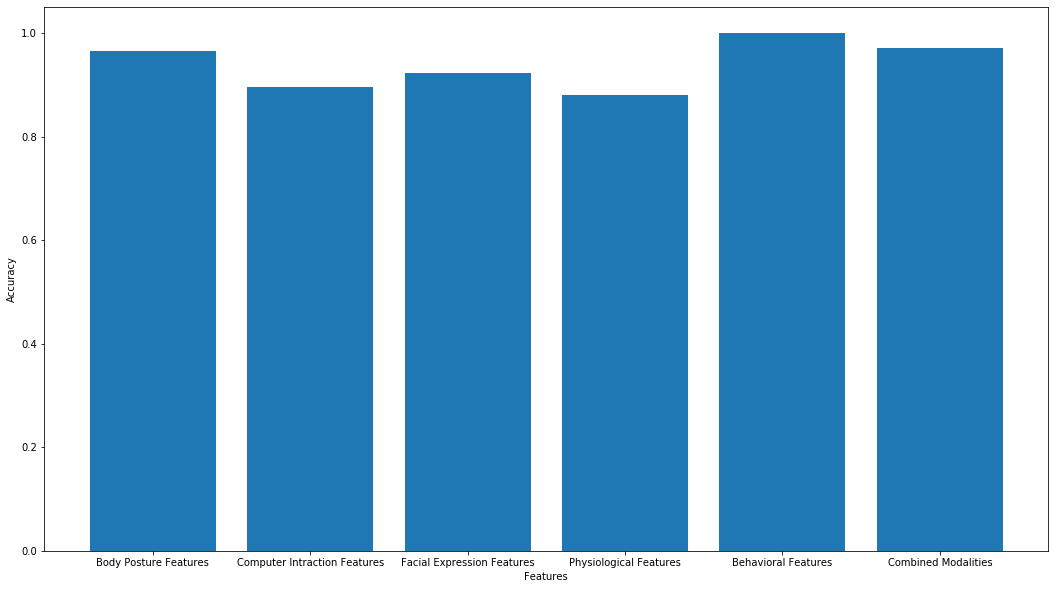

In [171]:
figure(figsize=(18, 10))
plt.bar(['Body Posture Features', 'Computer Intraction Features', 'Facial Expression Features', 'Physiological Features', 'Behavioral Features', 'Combined Modalities'], [ac_BPF, ac_CIF, ac_FEF, ac_PF, ac_BF, ac_comb_modalities])
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.show()